## Problem Statement 

In the telecommunications sector, the key challenge is minimizing customer churn to maximize profitability. While various strategies exist, prioritizing retention offers the highest return on investment. However, accurately predicting and preventing churn remains a significant obstacle. Leveraging machine learning to forecast churn based on historical data presents a promising solution, crucial for sustaining competitiveness and long-term success in the industry.

## Objective

The objective of this machine learning churn prediction project is to develop an accurate and robust model capable of forecasting customer churn in the telecommunications sector. By leveraging historical data and advanced machine learning techniques, the aim is to identify customers at risk of leaving early on, enabling proactive retention strategies. The ultimate goal is to enhance profitability and competitiveness by minimizing churn rates and maximizing customer retention.

## Few questions need to ask before proceeding !

1. Historical data is available 
2. Target column is given - `Churn` (Supervised learning)
3. Datatype of target column - `Discrete` (Classification)
4. Models in use - All classification models
5. Evaluation Metrics - Accuracy score

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv(r"C:\Users\isham\Downloads\churn_dataset.csv", na_values=['NA', 'null', '', ' '])
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Copy original data for preventing the data loss

df = d.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
print('Shape of the Data:', df.shape)
print('Columns in the Data:',df.columns.tolist())

Shape of the Data: (7043, 21)
Columns in the Data: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [8]:
#### CustomerID column is not necessary hence removing it

df.drop('customerID', axis=1, inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Cleaning Null values from Total Charges column

In [10]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
# Imputing nan values with median

In [12]:
df['TotalCharges'].median()

1397.475

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [14]:
df['TotalCharges'].isnull().sum()

0

In [15]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
### Outliers Detection

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

print('Monthly Outliers:',detect_outliers_iqr(df['MonthlyCharges']))
print('Total Charges Outliers:',detect_outliers_iqr(df['TotalCharges']))
print('Tenure Outliers:',detect_outliers_iqr(df['tenure']))

Monthly Outliers: []
Total Charges Outliers: []
Tenure Outliers: []


## Exploratory Data Analysis (EDA)

## Univariate Analysis 

### A) Demographic Features - Let us first understand the gender, age range, partner and dependent status of the customers

### Partner Feature

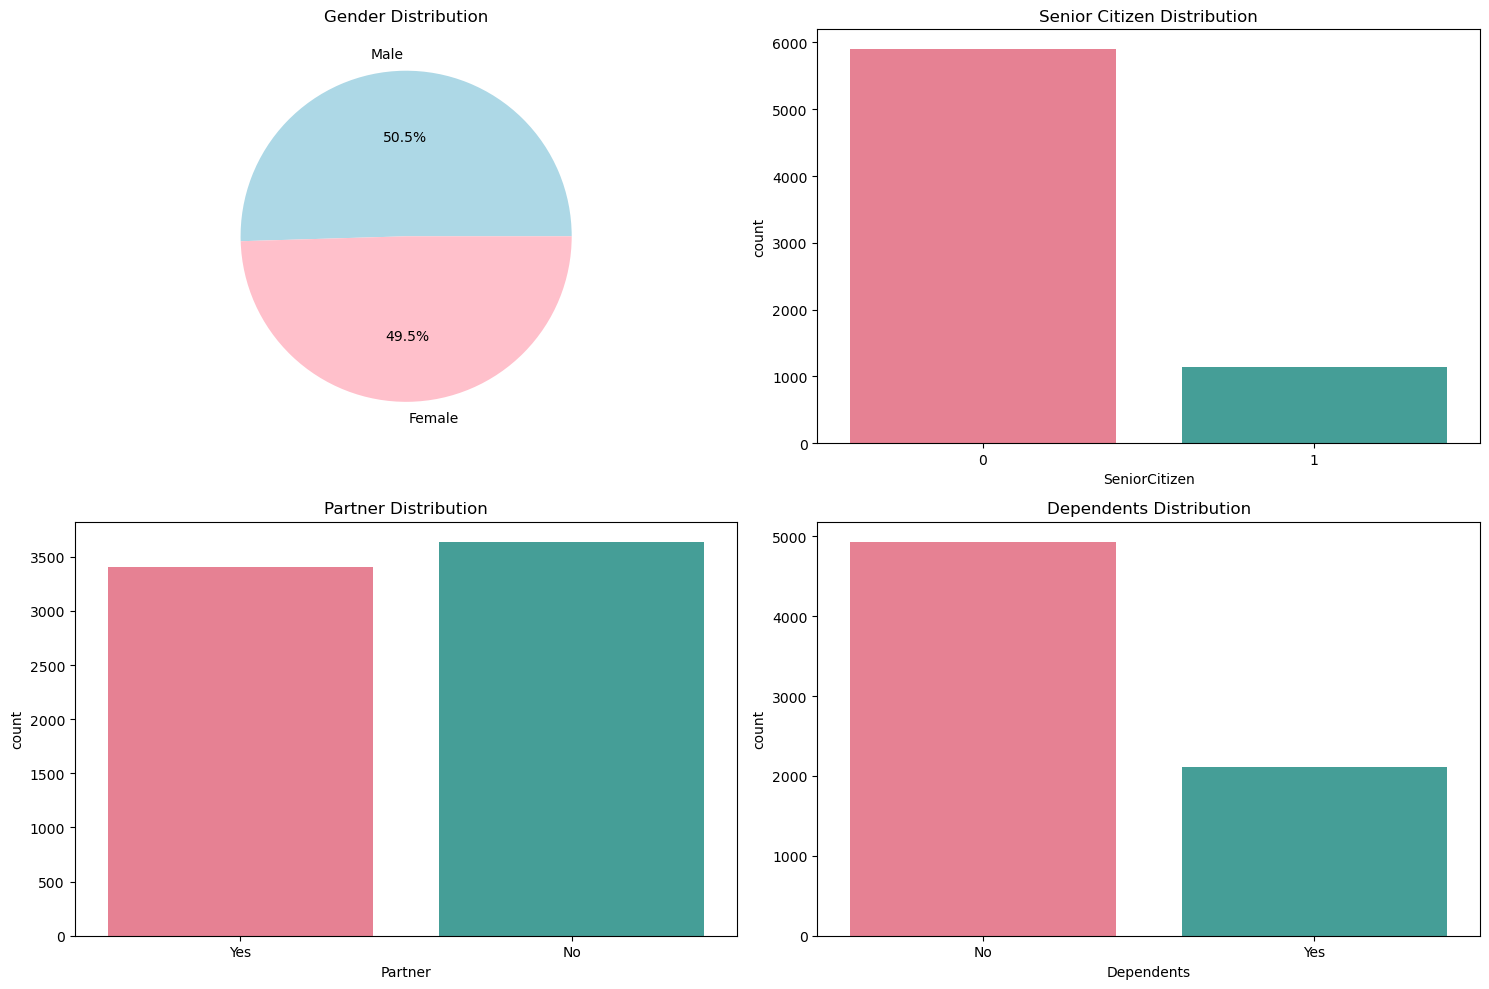

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0,0].pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', colors=['lightblue','pink'])
axs[0,0].set_title('Gender Distribution')

sns.countplot(x='SeniorCitizen', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('Senior Citizen Distribution')

sns.countplot(x='Partner', data=df, palette='husl', ax=axs[1,0])
axs[1,0].set_title('Partner Distribution')

sns.countplot(x='Dependents', data=df, palette='husl', ax=axs[1,1])
axs[1,1].set_title('Dependents Distribution')

plt.tight_layout()
plt.show()

#### Observation

1. 50.5% of the customer is Male and 49.5% of the customer is Female. Approximately same number of male and female beneficiary is present in the data. Hence gender is distributed uniformly.
2. Approx 16% of the customers are senior citizen and rest 84% customers are not senior citizen. Thus most of the people's are younger to middle age people.
3. 48% customers are having their partners and 52% having no partners, but the ratio is very small.
4. 30% customers are having dependents upon them and rest 70% are having no dependents

### B) Customer Account Information - Let us now understand the tenure, contract, payment method, paperless billing, monthly charges, and total charges

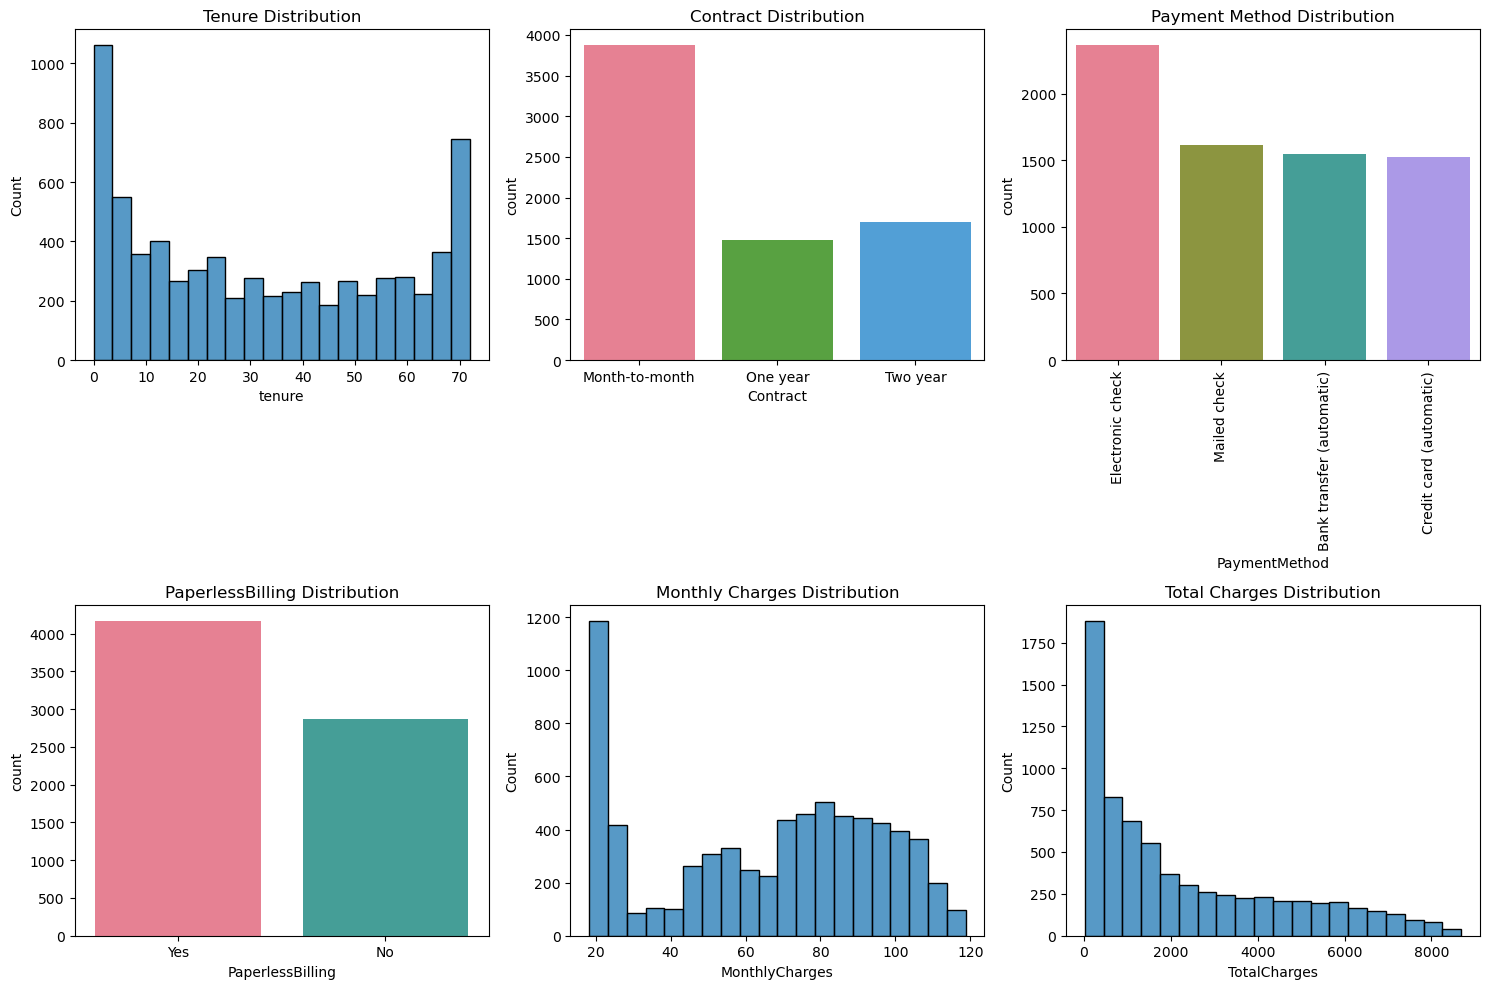

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df['tenure'], bins=20, ax=axs[0,0])
axs[0,0].set_title('Tenure Distribution')

sns.countplot(x='Contract', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('Contract Distribution')

sns.countplot(x='PaymentMethod', data=df, palette='husl', ax=axs[0,2])
axs[0,2].set_title('Payment Method Distribution')
axs[0,2].tick_params(axis='x', rotation=90)

sns.countplot(x='PaperlessBilling', data=df, palette='husl', ax=axs[1,0])
axs[1,0].set_title('PaperlessBilling Distribution')

sns.histplot(df['MonthlyCharges'], bins=20, ax=axs[1,1])
axs[1,1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'], bins=20, ax=axs[1,2])
axs[1,2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()

#### Observation - 

1. Majority (8%) of the customers have stayed with the company for a month only,it may be because of other influencial factors like contract or charges but there are also instances where customers around (5%) remained with the company for up to 72 months.
2. 55% of the customers are inclined towards opting for a month-to-month contract rather than committing to a one-year or two-year agreement. But a little number seen more in 2 year contract as compared to 1 year contract.
3. 33.5% of customers have chosen the Electronic check method, while the remaining methods are equally favored among customers.
4. 60% of the customers are prefering paperless billing rather than paper billing.
5. Customers are mostly paying monthly charges of 64 Rs. on an average. Majority customers paying monthly charges for approx 20 Rs.
6. Customers are higly paying total charges of approx 20 Rs. Whereas interestingly on an average customers are paying around 2284 Rs to the company.

### C). Distribution of various services used by customers

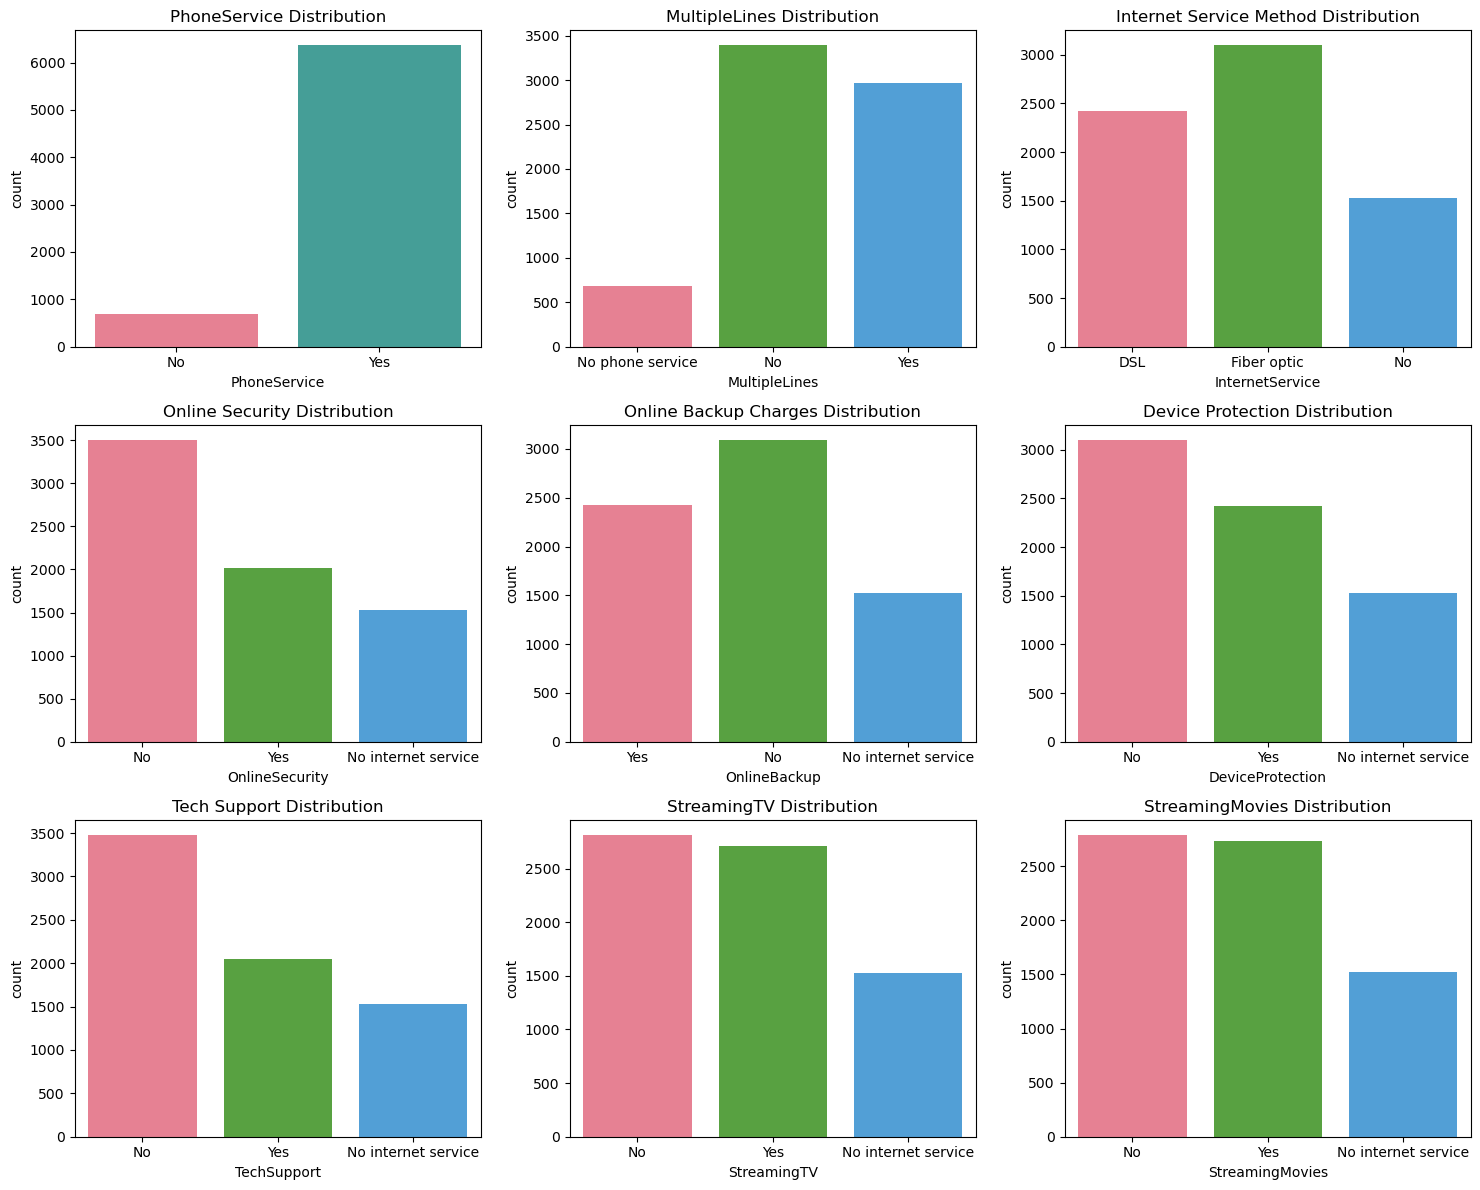

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

sns.countplot(x='PhoneService',data=df, palette='husl', ax=axs[0,0])
axs[0,0].set_title('PhoneService Distribution')

sns.countplot(x='MultipleLines', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('MultipleLines Distribution')

sns.countplot(x='InternetService', data=df, palette='husl', ax=axs[0,2])
axs[0,2].set_title('Internet Service Method Distribution')

sns.countplot(x='OnlineSecurity', data=df, palette='husl', ax=axs[1,0])
axs[1,0].set_title('Online Security Distribution')

sns.countplot(x='OnlineBackup',data=df, palette='husl', ax=axs[1,1])
axs[1,1].set_title('Online Backup Charges Distribution')

sns.countplot(x='DeviceProtection', data=df, palette='husl', ax=axs[1,2])
axs[1,2].set_title('Device Protection Distribution')

sns.countplot(x='TechSupport', data=df, palette='husl', ax=axs[2,0])
axs[2,0].set_title('Tech Support Distribution')

sns.countplot(x='StreamingTV', data=df, palette='husl', ax=axs[2,1])
axs[2,1].set_title('StreamingTV Distribution')

sns.countplot(x='StreamingMovies', data=df, palette='husl', ax=axs[2,2])
axs[2,2].set_title('StreamingMovies Distribution')

plt.tight_layout()
plt.show()

### Observation - 

1. 91% of the customers are having phone services provided by the company.
2. 48% do not have multiple line services concurrently, while 42% have multiple line services, indicating a relatively small difference between these two groups. Conversely, 10% of customers do not have any phone services at all.
3. According to this data, fiber optic internet service is favored by approximately 44% of customers, making it the most popular choice, followed by DSL. Interestingly approx 22% of the customer doesn't have internet services from the company, it could be possible that these customers are having internet services of competitor company.
4. 50% customers have no online security services with the whereas 30% are having.
5. 44% of the customers are having no online backup services whereas 35% are having them.
6. 44% of the customers are having no device protection.
7. 49% of the customers are having no Tech support with them
8. Customers who are having streaming tv services are equal to the customers who are not having it. Ratio is same.
9. Customers who are having streaming movies services are equal to the customers who are not having it. Here also Ratio is same.

From the above scenarios it is possible to say that customers are preferring to have only few services out of many like phone services, fiber optic, streamingtv, streaming movies. Majority are having these services with them. And in rest of the services decline ratio is more.

### Target Column distribution - Churn

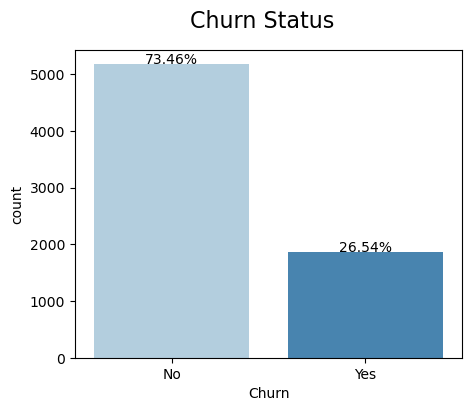

In [22]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Churn', data=df, palette='Blues')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.suptitle('Churn Status', fontsize=16)
plt.show()

#### Observation - 

According to the data, approx 26% of the customers left the company with a month and rest 74% customers stayed with the company which is overall suggesting a good number. Cleary it is visible that the data is heavily skewed and which is obvious also as we would expect large majority of customers to not churn, but we will analysis more in depth about those 26% customer churn.

## Bivariate Analysis 

### Churn and All Numerical Columns

In [23]:
df1 = df.loc[:,['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]

df1['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


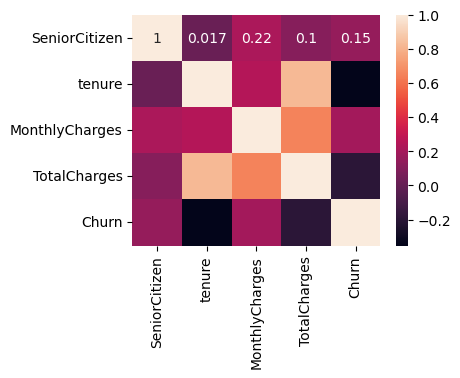

In [24]:
plt.figure(figsize=(4,3))
sns.heatmap(df1.corr(), annot=True)
plt.show()

#### Observation - 

Senior citizen and montly charges are positively correlated with churn but making a very weak positive correlation whish means as montly charges increasing churn is also increasing and same goes with senior citizen also. 

Interestingly Tenure and total charges are negatively correlated with churn where tenure is having moderate negative correlation which means as tenure is increasing so churn is decreasing and vice-versa and same goes with total charges also but it is making a very weak negative correlation. 

It could also be seen that tenure and total charges are highly correlated with each other as their making almost a strong positive correlation. And total charges is also having moderate positive correlation with monthly charges.

In [25]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


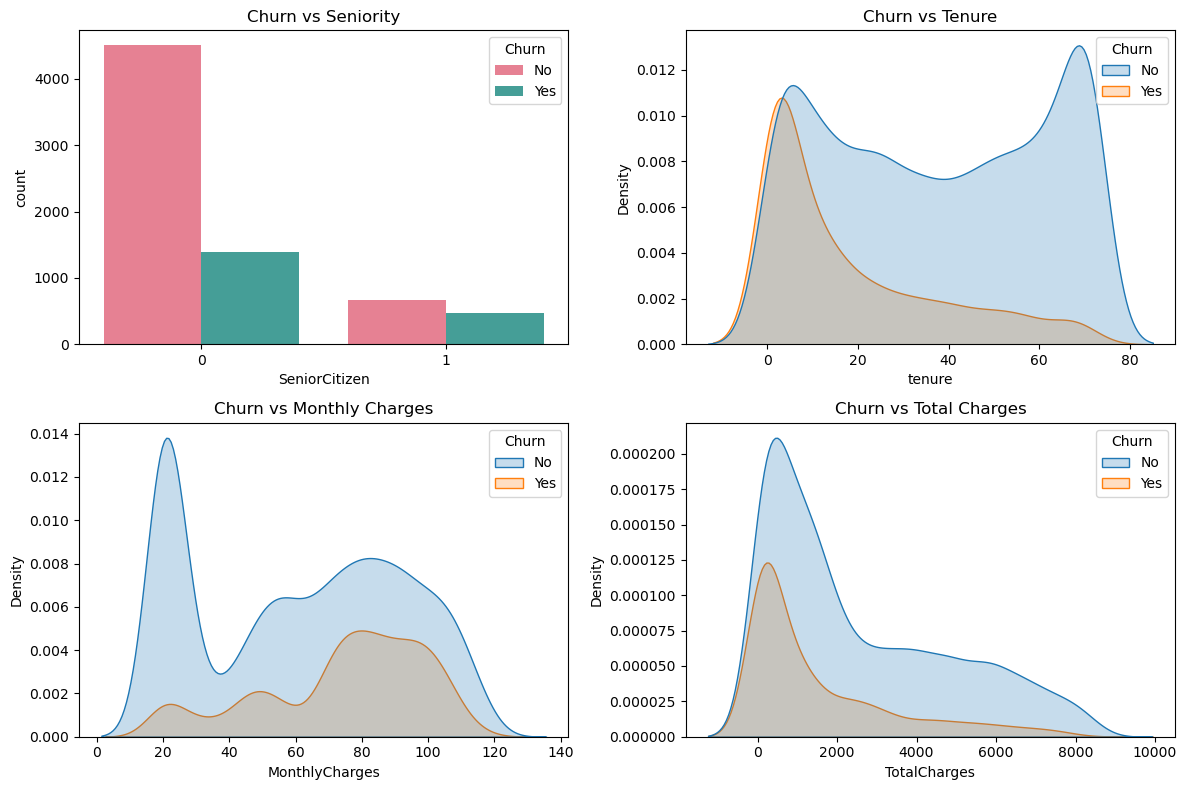

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='husl', ax=axs[0,0])
axs[0,0].set_title('Churn vs Seniority')

sns.kdeplot(data=df, x='tenure', hue='Churn',fill=True, ax=axs[0,1])
axs[0,1].set_title('Churn vs Tenure')

sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn',fill=True, ax=axs[1,0])
axs[1,0].set_title('Churn vs Monthly Charges')

sns.kdeplot(data=df, x='TotalCharges', hue='Churn',fill=True, ax=axs[1,1])
axs[1,1].set_title('Churn vs Total Charges')

plt.tight_layout()
plt.show()

#### Observation - 

1. Approx 42% senior citizens have been churned out and rest 58% senior citizens stayed with the company. And in young customers, approx 24% young customers have been churned out and rest 76% stayed with the company. So churn could happen if customer is senior citizen.
2. Churn is happening more when tenure is very very less when it is for a month only. And as tenure becomes more churn started decreasing.
3. As monthly charges increasing churn is also increasing. But it could be seen that after a certain point even if monthly charges are very high, churn started decreasing. It could be due the influence of other factor. Customers paying high monthly charges have churned out.
4. When total charges is quite low, churn is increasing and eventually when total charges increasing churn started decreasing which is showing reverse phenomena. Will study more to make conclusion on this phenomena.

### Tenure vs Total Charges and Total Charges vs Monthly Charges

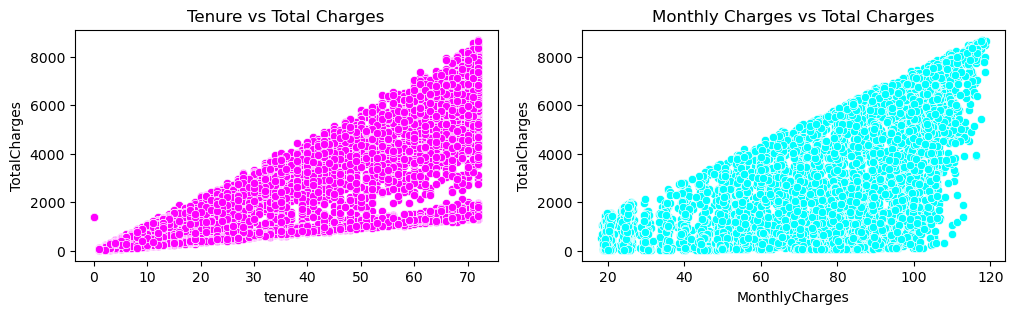

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

sns.scatterplot(x='tenure',y='TotalCharges',data=df,color='magenta', ax=axs[0])
axs[0].set_title('Tenure vs Total Charges')

sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,color='cyan', ax=axs[1])
axs[1].set_title('Monthly Charges vs Total Charges')

plt.show()

#### Observation - 

1. As expected since tenure is increasing, total charges is also increasing simultaneously.
2. When monthly charges increasing, total charges is also increasing.

Tenure is having a very positive impact on churn. Will more deep dive into this by seen segregating it into different tenure levels (contract type).

### Churn and All Categorical Columns

In [28]:
df2 = df.select_dtypes(include=['object'])
df2.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


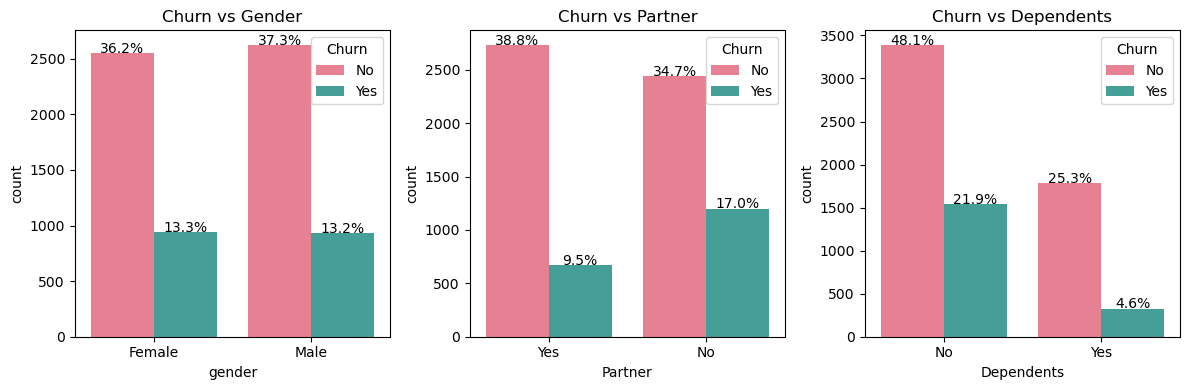

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x='gender',hue='Churn',data=df,palette='husl', ax=axs[0])
axs[0].set_title('Churn vs Gender')

total = len(df)
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='Partner',hue='Churn',data=df,palette='husl', ax=axs[1])
axs[1].set_title('Churn vs Partner')

for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='Dependents',hue='Churn',data=df,palette='husl', ax=axs[2])
axs[2].set_title('Churn vs Dependents')

for p in axs[2].patches:
    height = p.get_height()
    axs[2].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")


plt.tight_layout()
plt.show()

#### Observations -

1. Both male and female has equally contributing to churn.
2. Customers with having no partners are contributing by 17% to churn as compared to those who are having partners.
3. Customers having no dependence are contributing by 21.9% to churn whereas customers having dependents are only contributing by 4.6% to churn.

It could be possible to say that customers who are having no partners and no dependents are possibly contributing more towards churn.

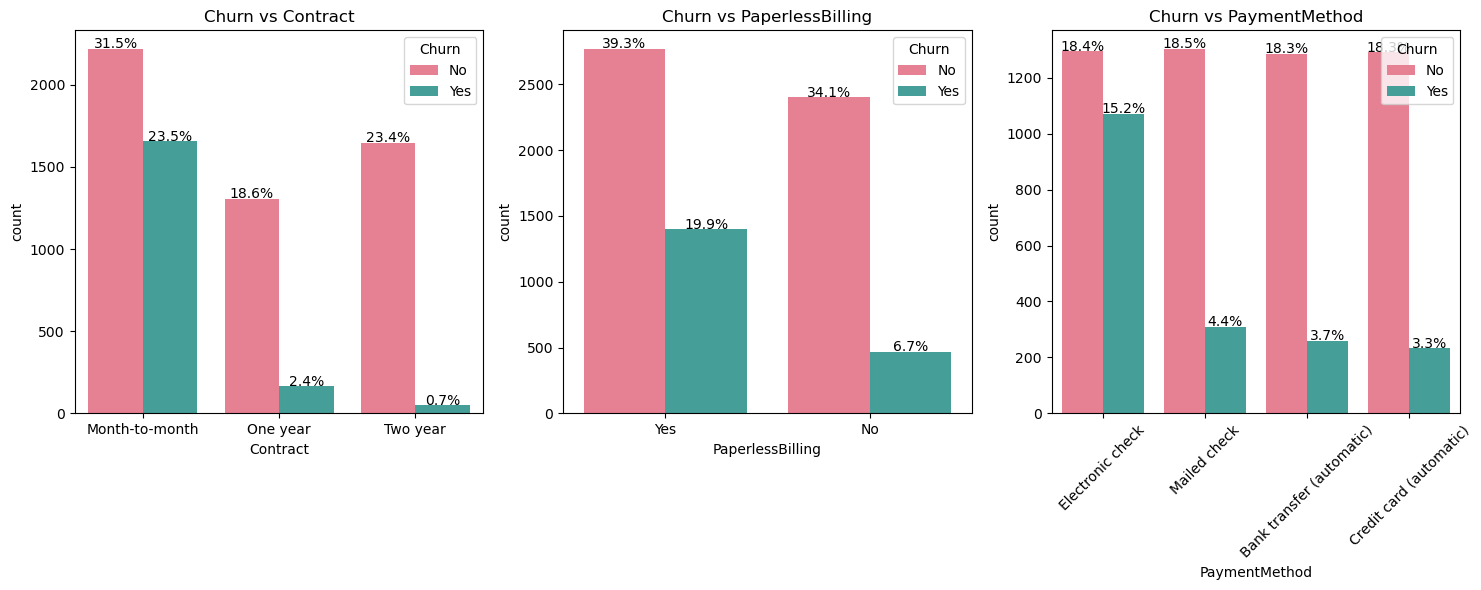

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

sns.countplot(x='Contract',hue='Churn',data=df,palette='husl', ax=axs[0])
axs[0].set_title('Churn vs Contract')

total = len(df)
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='PaperlessBilling',hue='Churn',data=df,palette='husl', ax=axs[1])
axs[1].set_title('Churn vs PaperlessBilling')

for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='PaymentMethod',hue='Churn',data=df,palette='husl', ax=axs[2])
axs[2].set_title('Churn vs PaymentMethod')
axs[2].tick_params(axis='x', rotation=45)

for p in axs[2].patches:
    height = p.get_height()
    axs[2].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")


plt.tight_layout()
plt.show()

#### Observations - 

1. As expected, majority of the churn is happening when the contract is for month-to-month. Around 23.5% customer churned out whereas when the contract is increasing for years then churn is highly low by 0.7%. 
2. Interestingly, customers opted for paperlessbilling is contributing more towards churn by approx 20% as compared with customers not opted or paperlessbilling.
3. It could be seen that customers those who have opted for Electronic check for payment method have contributed approx 15.2% towards churn.

Contract type is having more impact over churn.

### Churn and all types of Services columns

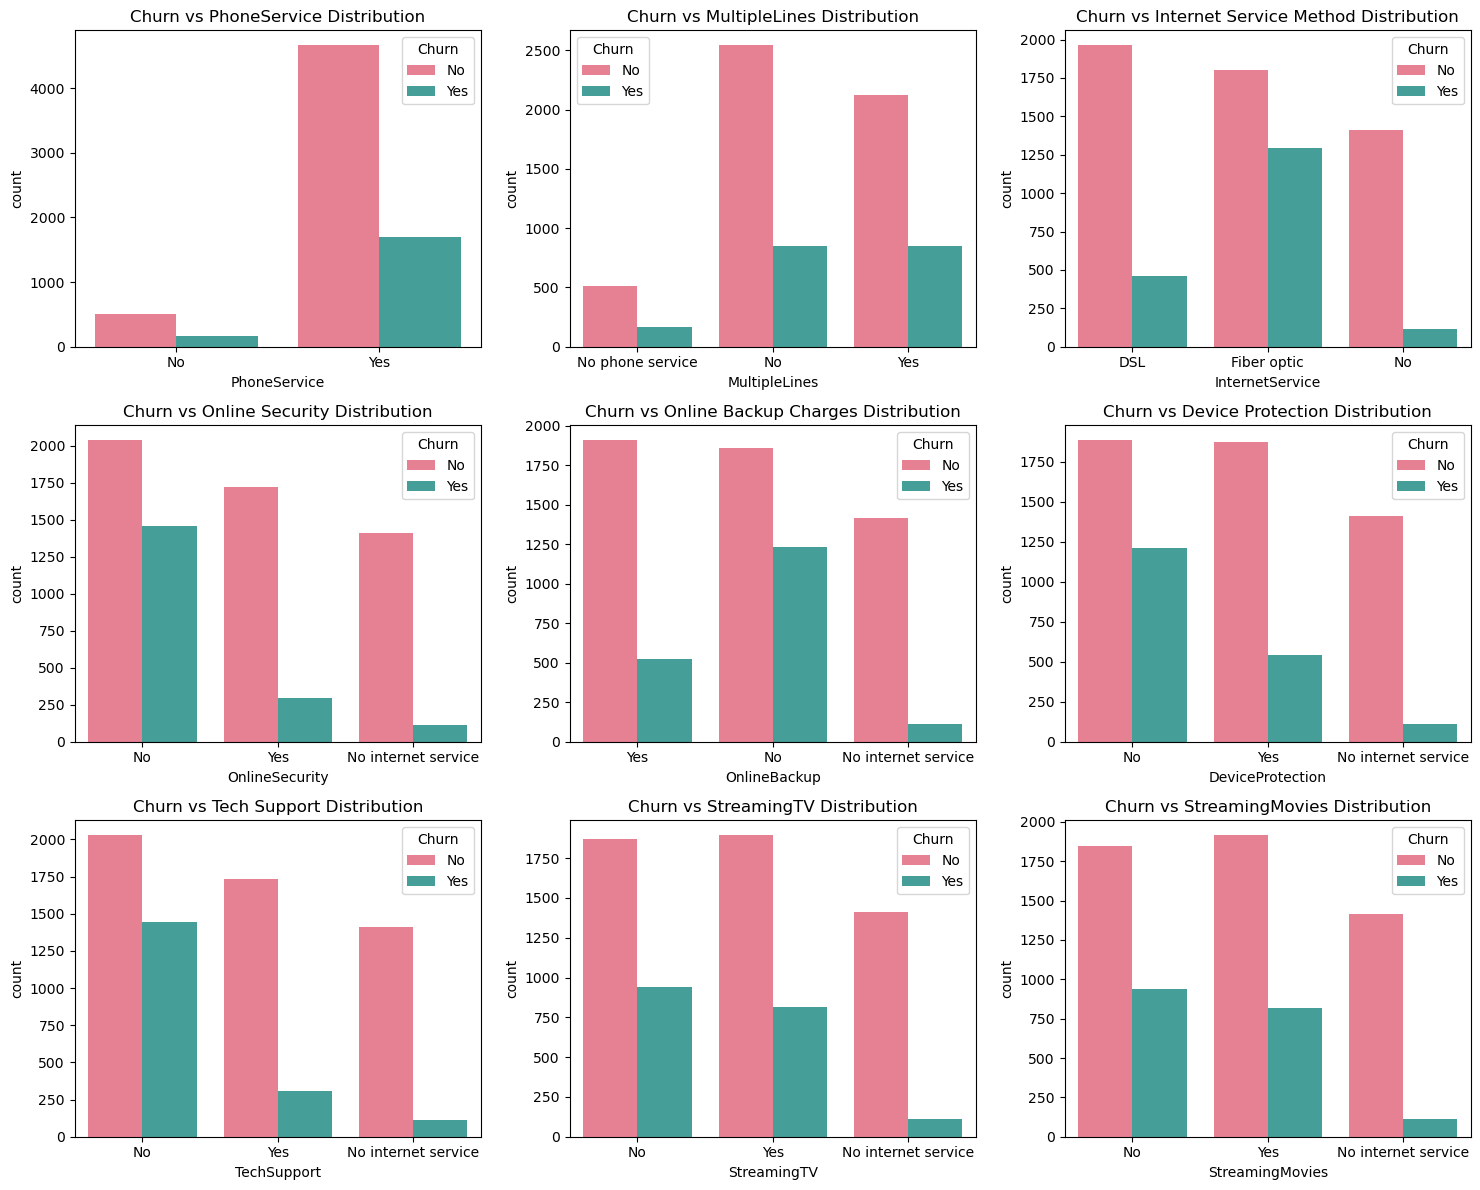

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

sns.countplot(x='PhoneService',hue='Churn', data=df, palette='husl', ax=axs[0,0])
axs[0,0].set_title('Churn vs PhoneService Distribution')

sns.countplot(x='MultipleLines',hue='Churn', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('Churn vs MultipleLines Distribution')

sns.countplot(x='InternetService', hue='Churn', data=df, palette='husl', ax=axs[0,2])
axs[0,2].set_title('Churn vs Internet Service Method Distribution')

sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='husl', ax=axs[1,0])
axs[1,0].set_title('Churn vs Online Security Distribution')

sns.countplot(x='OnlineBackup',hue='Churn', data=df, palette='husl', ax=axs[1,1])
axs[1,1].set_title('Churn vs Online Backup Charges Distribution')

sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='husl', ax=axs[1,2])
axs[1,2].set_title('Churn vs Device Protection Distribution')

sns.countplot(x='TechSupport', hue='Churn', data=df, palette='husl', ax=axs[2,0])
axs[2,0].set_title('Churn vs Tech Support Distribution')

sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='husl', ax=axs[2,1])
axs[2,1].set_title('Churn vs StreamingTV Distribution')

sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='husl', ax=axs[2,2])
axs[2,2].set_title('Churn vs StreamingMovies Distribution')

plt.tight_layout()
plt.show()

In [32]:
dsl_cust = df[df['InternetService'] == 'DSL'] #Cutomers opted for DSL
dsl_churn_cust = dsl_cust[dsl_cust['Churn']=='Yes'] #Customers who opted for DSL and churned out
prob_dsl_churn = len(dsl_churn_cust)/len(dsl_cust) #Probability
print(f'Probability of customer churn in the case of DSL internet service: {round(prob_dsl_churn*100,2)}')

fiber_cust = df[df['InternetService'] == 'Fiber optic'] #Customers opted for fiber optic
fiber_churn_cust = fiber_cust[fiber_cust['Churn']=='Yes'] #Customers who opted for fiber optic and churned out
prob_fiber_churn = len(fiber_churn_cust)/len(fiber_cust) #Probability
print(f'Probability of customer churn in the case of Fiber optic internet service: {round(prob_fiber_churn*100,2)}')

Probability of customer churn in the case of DSL internet service: 18.96
Probability of customer churn in the case of Fiber optic internet service: 41.89


In [33]:
tech_no_cust = df[df['TechSupport'] == 'No'] #Cutomers not opted for Tech Support
tech_no_churn_cust = tech_no_cust[tech_no_cust['Churn']=='Yes'] #Customers not opted for Tech Support and churned out
prob_no_tech_churn = len(tech_no_churn_cust)/len(tech_no_cust) #Probability
print(f'Probability of customer churn in the case of No Tech Support: {round(prob_no_tech_churn*100,2)}')

tech_yes_cust = df[df['TechSupport'] == 'Yes'] #Cutomers opted for Tech Support
tech_yes_churn_cust = tech_yes_cust[tech_yes_cust['Churn']=='Yes'] #Customers who opted for Tech Support and churned out
prob_yes_tech_churn = len(tech_yes_churn_cust)/len(tech_yes_cust) #Probability
print(f'Probability of customer churn in the case of having Tech Support: {round(prob_yes_tech_churn*100,2)}')

Probability of customer churn in the case of No Tech Support: 41.64
Probability of customer churn in the case of having Tech Support: 15.17


In [34]:
os_no_cust = df[df['OnlineSecurity'] == 'No'] #Customers not opted for online security
os_no_churn_cust = os_no_cust[os_no_cust['Churn'] == 'Yes'] #Customers not opted for online security and churned out
prob_no_os_churn = len(os_no_churn_cust)/len(os_no_cust)
print(f'Probability of customer churn in the case of No Online Security: {round(prob_no_os_churn*100,2)}')

os_yes_cust = df[df['OnlineSecurity'] == 'Yes'] #Customers not opted for online security
os_yes_churn_cust = os_yes_cust[os_yes_cust['Churn'] == 'Yes'] #Customers not opted for online security and churned out
prob_yes_os_churn = len(os_yes_churn_cust)/len(os_yes_cust)
print(f'Probability of customer churn in the case of having Online Security: {round(prob_yes_os_churn*100,2)}')

Probability of customer churn in the case of No Online Security: 41.77
Probability of customer churn in the case of having Online Security: 14.61


#### Observation - 

1. Churn is quite higher into area of Online Security, Fibre optic internet service and Tech support.
2. A customer opted for fibre optic has a probability to churned out is **2.2 times** more as compared to customer opted for DSL. Since there is 41.89% probability of customer churn in the case of fiber optic and 18.96% probability in the case of DSL.
3. Having DSL internet service reducing the probability of churn. Interestingly, Fiber optic is fast but still it is having highest churn rate.
4. Customer those are not having Tech support are likely to be churned out by **2.75** times more as compared to customers having tech support service. It could be possible that those customers faced some sort of issue during their lifecycle with the company and due to non-availability of tech support service they have churned out.
5. Customer those are not having Online Security services are likely to be churned out by **2.85** times more as compared to customers having online security service.

Company can focus on providing tech support and online security as must haves to their customers to reduce churn. Fiber optic is heavily contributing towards churn.

## Multivariate Analysis 

### Internet Service vs Churn vs Total charges

In [35]:
fiber_optic_avg = df[df['InternetService'] == 'Fiber optic']['TotalCharges'].mean()
fiber_optic_avg

3205.3045704134365

In [36]:
dsl_avg = df[df['InternetService'] == 'DSL']['TotalCharges'].mean()
dsl_avg

2118.2974907063194

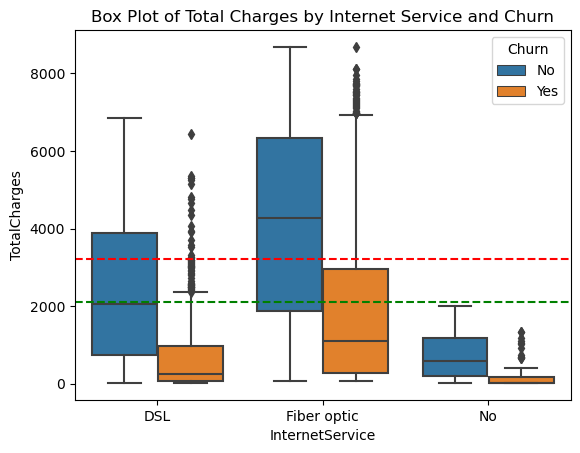

In [37]:
sns.boxplot(data=df, x="InternetService", y="TotalCharges", hue="Churn")
plt.title('Box Plot of Total Charges by Internet Service and Churn')
plt.axhline(fiber_optic_avg, color='red', linestyle='--')
plt.axhline(dsl_avg, color='green', linestyle='--')
plt.show()

It could be seen that as average total charges is quite high for fiber optic as compared with dsl, it could be the possible reason that customers are churning out more in the case of fiber optic because of its higher charges.

### Internet Service vs Tech Support vs Churn

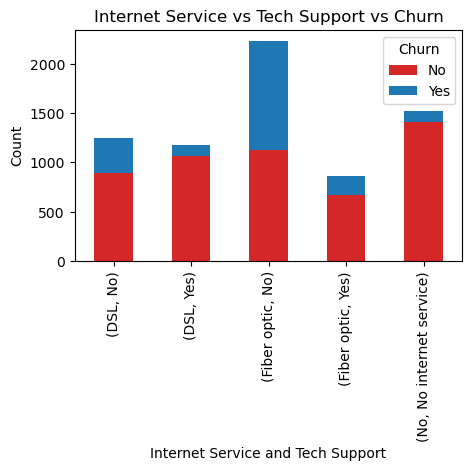

In [38]:
crosstab=pd.crosstab([df['InternetService'], df['TechSupport']], df['Churn'])
crosstab.plot(kind='bar', stacked=True,color=['#d62728', '#1f77b4'], figsize=(5, 3))
plt.xlabel('Internet Service and Tech Support')
plt.ylabel('Count')
plt.title('Internet Service vs Tech Support vs Churn')
plt.show()

Higher number of peoples churned out from fiber optic when there is non availability of tech support, which indicates a higher association between fiber optic and tech support. 

## Conclusion - 

1. **Customer churn is highly possible when the contract type is of month-to-month basis**, after that churn got severely reduced. Around 23.5% customer churned out whereas when the contract is increasing for years then churn is very low by 0.7%. Interestingly, 55% of the customers are inclined towards opting for a month-to-month contract rather than committing to a one-year or two-year agreement.
2. **Customers those who churned out were paying high monthly charges.** It is be seen that monthly charges and churn is correlated.
3. **Tenure and Total Charges are negatively correlated with churn** were as tenure and total charges is increasing so the churn is decreasing. Hence it is better to offer customer long term tenure with more than one month contract. 
4. Approx 42% senior citizens have been churned out and rest 58% senior citizens stayed with the company. And in young customers, approx 24% young customers have been churned out and rest 76% stayed with the company. **So churn could happen if customer is senior citizen.**
5. Both male and female has equally contributing to churn.
6. Customers with having no partners are contributing by 17% to churn as compared to those who are having partners.
7. Customers having no dependence are contributing by 21.9% to churn whereas customers having dependents are only contributing by 4.6% to churn.
8. **It could be possible to say that customers who are having no partners and no dependents are possibly contributing more towards churn.**
9. Approx 26% of the customers left the company with a month and rest 74% customers stayed with the company which is overall suggesting a good number.
10. **Customers opted for paperlessbilling is contributing more towards churn by approx 20%.**
11. **customers those who have opted for Electronic check for payment method have contributed approx 15.2% towards churn.**
12. **Churn is quite higher into area of Online Security, Fibre optic internet service and Tech support.**
13. **A customer opted for fibre optic has a probability to churned out is 2.2 times** more as compared to customer opted for DSL. Since there is 41.89% probability of customer churn in the case of fiber optic and 18.96% probability in the case of DSL.
14. Having DSL internet service reducing the probability of churn. Interestingly, Fiber optic is fast but still it is having highest churn rate.
15. **Customer those are not having Tech support are likely to be churned out by 2.75** times more as compared to customers having tech support service. It could be possible that those customers faced some sort of issue during their lifecycle with the company and due to non-availability of tech support service they have churned out.
16. **Customer those are not having Online Security services are likely to be churned out by 2.85** times more as compared to customers having online security service.
17. Company can focus on providing tech support and online security as must haves to their customers to reduce churn. Fiber optic is heavily contributing towards churn.
18. It could be seen that as average total charges is quite high for fiber optic as compared with dsl, it could be the possible reason that customers are churning out more in the case of fiber optic because of its higher charges.
19. Higher number of peoples churned out from fiber optic when there is non availability of tech support, which indicates a higher association between fiber optic and tech support.
20. Contract, Tenure, Monthly charges, Total charges, Senior Citizen, Internet service, Tech support, Online security, Paperlessbiling, Payment method, Partners and Dependents are the most important attributes which are contributing towards churn.

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
#Selecting Important features according to EDA

df =  df[['SeniorCitizen','Partner','Dependents','tenure','InternetService','TechSupport','PaperlessBilling','PaymentMethod','StreamingTV','StreamingMovies','Contract','MonthlyCharges','TotalCharges','Churn']]

## Data Preprocessing

In [41]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,Electronic check,No,No,Month-to-month,29.85,29.85,No
1,0,No,No,34,DSL,No,No,Mailed check,No,No,One year,56.95,1889.50,No
2,0,No,No,2,DSL,No,Yes,Mailed check,No,No,Month-to-month,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Bank transfer (automatic),No,No,One year,42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,Yes,Electronic check,No,No,Month-to-month,70.70,151.65,Yes


## Segregating input columns and target column

In [42]:
y = df['Churn']
x = df.drop('Churn',axis=1)

In [43]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [44]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
0,0,Yes,No,1,DSL,No,Yes,Electronic check,No,No,Month-to-month,29.85,29.85
1,0,No,No,34,DSL,No,No,Mailed check,No,No,One year,56.95,1889.50
2,0,No,No,2,DSL,No,Yes,Mailed check,No,No,Month-to-month,53.85,108.15
3,0,No,No,45,DSL,Yes,No,Bank transfer (automatic),No,No,One year,42.30,1840.75
4,0,No,No,2,Fiber optic,No,Yes,Electronic check,No,No,Month-to-month,70.70,151.65


## Spliting the data into train & test

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4930, 13) (4930,)
(2113, 13) (2113,)


## Separating Categorical and Numerical columns form x_train data

In [46]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
1695,0,Yes,Yes,54,DSL,Yes,Yes,Electronic check,Yes,No,One year,70.70,3770.00
1095,0,No,No,1,Fiber optic,No,Yes,Electronic check,Yes,No,Month-to-month,80.55,80.55
3889,0,No,No,13,No,No internet service,No,Credit card (automatic),No internet service,No internet service,One year,19.30,259.65
3667,1,Yes,Yes,24,Fiber optic,No,Yes,Electronic check,Yes,Yes,Two year,96.55,2263.45
2902,1,No,No,6,Fiber optic,No,Yes,Electronic check,No,No,Month-to-month,74.10,450.90


In [47]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_cat.head()

,Partner,Dependents,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract
1695,Yes,Yes,DSL,Yes,Yes,Electronic check,Yes,No,One year
1095,No,No,Fiber optic,No,Yes,Electronic check,Yes,No,Month-to-month
3889,No,No,No,No internet service,No,Credit card (automatic),No internet service,No internet service,One year
3667,Yes,Yes,Fiber optic,No,Yes,Electronic check,Yes,Yes,Two year
2902,No,No,Fiber optic,No,Yes,Electronic check,No,No,Month-to-month


In [48]:
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head() #Since senior citizen values are encoded in 1's and 0's hence scalling is not required for it

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1695,0,54,70.70,3770.00
1095,0,1,80.55,80.55
3889,0,13,19.30,259.65
3667,1,24,96.55,2263.45
2902,1,6,74.10,450.90


In [49]:
#Preprocessing tenure, monhtlycharges, totalcharges for rescalling except senior citizen

x_train_num_mtt = x_train_num[['tenure','MonthlyCharges','TotalCharges']]
x_train_num_mtt.head()

,tenure,MonthlyCharges,TotalCharges
1695,54,70.70,3770.00
1095,1,80.55,80.55
3889,13,19.30,259.65
3667,24,96.55,2263.45
2902,6,74.10,450.90


In [50]:
x_train_num_sc = x_train_num[['SeniorCitizen']]
x_train_num_sc.head()

,SeniorCitizen
1695,0
1095,0
3889,0
3667,1
2902,1


### i) Scalling numerical column

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_mtt_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num_mtt),
                                         columns = x_train_num_mtt.columns,
                                         index = x_train_num_mtt.index)

x_train_num_mtt_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
1695,0.881078,0.195927,0.653962
1095,-1.284263,0.522755,-0.975728
3889,-0.793997,-1.509551,-0.896617
3667,-0.344587,1.053643,-0.011506
2902,-1.079985,0.308740,-0.812139


### Concatenating rescaled Tenure, Monthly Charges, Total Charges and Senior Citizen feature

In [52]:
x_train_num_rescaled = pd.concat([x_train_num_sc, x_train_num_mtt_rescaled], axis=1)
x_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1695,0,0.881078,0.195927,0.653962
1095,0,-1.284263,0.522755,-0.975728
3889,0,-0.793997,-1.509551,-0.896617
3667,1,-0.344587,1.053643,-0.011506
2902,1,-1.079985,0.308740,-0.812139


### ii) Applying OneHotEncoder to Categorical column

In [53]:
x_train_cat.head()

,Partner,Dependents,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract
1695,Yes,Yes,DSL,Yes,Yes,Electronic check,Yes,No,One year
1095,No,No,Fiber optic,No,Yes,Electronic check,Yes,No,Month-to-month
3889,No,No,No,No internet service,No,Credit card (automatic),No internet service,No internet service,One year
3667,Yes,Yes,Fiber optic,No,Yes,Electronic check,Yes,Yes,Two year
2902,No,No,Fiber optic,No,Yes,Electronic check,No,No,Month-to-month


In [57]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat),
                              columns = encoder.get_feature_names_out(x_train_cat.columns),
                              index = x_train_cat.index)

x_train_cat_ohe.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
1695,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1095,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3889,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3667,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object)]

## Concatenating Encoded categorical and scaled numerical column

In [59]:
x_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1695,0,0.881078,0.195927,0.653962
1095,0,-1.284263,0.522755,-0.975728
3889,0,-0.793997,-1.509551,-0.896617
3667,1,-0.344587,1.053643,-0.011506
2902,1,-1.079985,0.308740,-0.812139


In [60]:
x_train_cat_ohe.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
1695,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1095,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3889,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3667,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x_train_transformed = pd.concat([x_train_num_rescaled,x_train_cat_ohe], axis=1)
x_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
1695,0,0.881078,0.195927,0.653962,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1095,0,-1.284263,0.522755,-0.975728,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3889,0,-0.793997,-1.509551,-0.896617,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3667,1,-0.344587,1.053643,-0.011506,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2902,1,-1.079985,0.308740,-0.812139,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Processing x-test data

In [62]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
185,0,Yes,No,1,DSL,No,Yes,Electronic check,No,No,Month-to-month,24.80,24.80
2715,0,No,No,41,No,No internet service,Yes,Bank transfer (automatic),No internet service,No internet service,Month-to-month,25.25,996.45
3825,0,Yes,Yes,52,No,No internet service,No,Mailed check,No internet service,No internet service,Two year,19.35,1031.70
1807,0,No,No,1,Fiber optic,No,No,Electronic check,No,No,Month-to-month,76.35,76.35
132,0,No,No,67,DSL,Yes,No,Bank transfer (automatic),No,No,Two year,50.55,3260.10


## Separating Categorical and Numerical columns form x_test data

In [63]:
x_test_cat = x_test.select_dtypes(include='object')
x_test_cat.head()

,Partner,Dependents,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract
185,Yes,No,DSL,No,Yes,Electronic check,No,No,Month-to-month
2715,No,No,No,No internet service,Yes,Bank transfer (automatic),No internet service,No internet service,Month-to-month
3825,Yes,Yes,No,No internet service,No,Mailed check,No internet service,No internet service,Two year
1807,No,No,Fiber optic,No,No,Electronic check,No,No,Month-to-month
132,No,No,DSL,Yes,No,Bank transfer (automatic),No,No,Two year


In [64]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head() #Since senior citizen values are encoded in 1's and 0's hence scalling is not required for it

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,0,1,24.80,24.80
2715,0,41,25.25,996.45
3825,0,52,19.35,1031.70
1807,0,1,76.35,76.35
132,0,67,50.55,3260.10


In [65]:
#Preprocessing tenure, monhtlycharges, totalcharges for rescalling except senior citizen

x_test_num_mtt = x_test_num[['tenure','MonthlyCharges','TotalCharges']]
x_test_num_mtt.head()

,tenure,MonthlyCharges,TotalCharges
185,1,24.80,24.80
2715,41,25.25,996.45
3825,52,19.35,1031.70
1807,1,76.35,76.35
132,67,50.55,3260.10


In [66]:
x_test_num_sc = x_test_num[['SeniorCitizen']]
x_test_num_sc.head()

,SeniorCitizen
185,0
2715,0
3825,0
1807,0
132,0


### i) Scalling numerical column

In [67]:
x_test_num_mtt_rescaled = pd.DataFrame(scaler.transform(x_test_num_mtt),
                                         columns = x_test_num_mtt.columns,
                                         index = x_test_num_mtt.index)

x_test_num_mtt_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
185,-1.284263,-1.327058,-1.000354
2715,0.349957,-1.312127,-0.571160
3825,0.799367,-1.507892,-0.555590
1807,-1.284263,0.383397,-0.977584
132,1.412199,-0.472660,0.428731


### Concatenating rescaled Tenure, Monthly Charges, Total Charges and Senior Citizen feature

In [68]:
x_test_num_rescaled = pd.concat([x_test_num_sc, x_test_num_mtt_rescaled], axis=1)
x_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,0,-1.284263,-1.327058,-1.000354
2715,0,0.349957,-1.312127,-0.571160
3825,0,0.799367,-1.507892,-0.555590
1807,0,-1.284263,0.383397,-0.977584
132,0,1.412199,-0.472660,0.428731


### ii) Applying OneHotEncoder to Categorical column

In [69]:
x_test_cat.head()

,Partner,Dependents,InternetService,TechSupport,PaperlessBilling,PaymentMethod,StreamingTV,StreamingMovies,Contract
185,Yes,No,DSL,No,Yes,Electronic check,No,No,Month-to-month
2715,No,No,No,No internet service,Yes,Bank transfer (automatic),No internet service,No internet service,Month-to-month
3825,Yes,Yes,No,No internet service,No,Mailed check,No internet service,No internet service,Two year
1807,No,No,Fiber optic,No,No,Electronic check,No,No,Month-to-month
132,No,No,DSL,Yes,No,Bank transfer (automatic),No,No,Two year


In [70]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat),
                             columns = encoder.get_feature_names_out(x_test_cat.columns),
                             index = x_test_cat.index)

x_test_cat_ohe.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
185,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2715,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3825,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1807,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Concatenating Encoded categorical and scaled numerical column

In [71]:
x_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,0,-1.284263,-1.327058,-1.000354
2715,0,0.349957,-1.312127,-0.571160
3825,0,0.799367,-1.507892,-0.555590
1807,0,-1.284263,0.383397,-0.977584
132,0,1.412199,-0.472660,0.428731


In [72]:
x_test_cat_ohe.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
185,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2715,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3825,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1807,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
x_test_transformed = pd.concat([x_test_num_rescaled,x_test_cat_ohe], axis=1)
x_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
185,0,-1.284263,-1.327058,-1.000354,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2715,0,0.349957,-1.312127,-0.571160,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3825,0,0.799367,-1.507892,-0.555590,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1807,0,-1.284263,0.383397,-0.977584,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0,1.412199,-0.472660,0.428731,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
print(x_train_transformed.shape, y_train.shape)

(4930, 20) (4930,)


In [75]:
print(x_test_transformed.shape, y_test.shape)

(2113, 20) (2113,)


## Model Building

## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.812588736393753

## KNN Classifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

NameError: name 'x_train_transformed' is not defined

## Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.754850922858495

## Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.6919072408897302

## Support Vector Machine

In [81]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.7993374349266446

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.7851396119261713

## Gradient Boosting Machines (GBM)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8050165641268339

### Conclusion

From Accuracy score values, we can see that Logistic Rregression model is performing better than others and also it is having accuracy score value of 0.8125 (81.25%) which is again better than other models. Hence we will use Logistic Regression model.